# 6.a

Bank renege
Llegué en  0.0000 Customer00: Here I am niggas
wait:  0 Customer00
 0.0000 Customer00: Waited  0.000
 3.5592 Customer00: Finished
Llegué en 12.4354 Customer01: Here I am niggas
wait:  0.0 Customer01
12.4354 Customer01: Waited  0.000
Llegué en 12.4698 Customer02: Here I am niggas
Llegué en 15.9687 Customer03: Here I am niggas
wait:  3.881674297619613 Customer02
16.3515 Customer02: RENEGED after  3.882
wait:  2.825946188997479 Customer03
18.7946 Customer03: RENEGED after  2.826
22.2867 Customer01: Finished
Llegué en 33.2901 Customer04: Here I am niggas
wait:  0.0 Customer04
33.2901 Customer04: Waited  0.000
60.7266 Customer04: Finished
número de clientes que llegaron:  5
atendidos:  3
renegados:  2
tiempo promedio de espera en la fila:  15.615724979928899 tiempos en la fila  [0, 12.435409363072129, 12.469815911454942, 15.968665309039542, 16.351490209074555, 18.79461149803702, 33.290082568824104]
tiempo promedio de espera en el banco:  28.857490839602338 tiempos en el banco  [

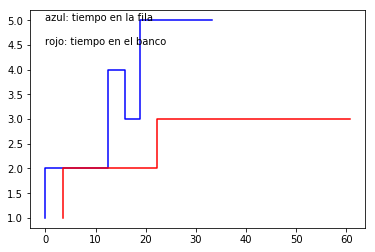

In [49]:
"""
Bank renege example

Covers:

- Resources: Resource
- Condition events

Scenario:
  A counter with a random service time and customers who renege. Based on the
  program bank08.py from TheBank tutorial of SimPy 2. (KGM)

"""
import random

import simpy

import random
import math
from matplotlib.pylab import hist, show
import time
x = str(int(time.time()))
x = float(x[len(x)-4:len(x)]) #esta es la semilla del número aleatorio

RANDOM_SEED = 42
NEW_CUSTOMERS = 5  # Total number of customers
INTERVAL_CUSTOMERS = 10.0  # Generate new customers roughly every x seconds
MIN_PATIENCE = 2  # Min. customer patience
MAX_PATIENCE = 4  # Max. customer patience
atendidos = renegados = clientes = 0
#clientes = []
tiempoEnFila = []
tiempoEnBanco = []
clientesEnFila = []
clientesEnBanco = []

def congruencialMixto():
    global x
    x = x + 1
    a=1013904223 #5.0
    c=1664525 #4.0
    m=2**32 #8.0
    numero=float((a*x+c)%m)
    aleatorio=float(numero/m)
    return aleatorio

def continuaExponencial(media):
    lambdaa = 1 / media
    x = (-1/lambdaa) * math.log(congruencialMixto())#, math.exp(1))
    #x = x**(-1)
    #print ("continuaExponencial: ", x)
    return x #**(-1) #lo invertí

def uniformeContinua(a, b):
    x = congruencialMixto()
    uniforme = a + x * (b-a) 
    return uniforme

def source(env, number, interval, counter):
    """Source generates customers randomly"""
    for i in range(number):
        c = customer(env, 'Customer%02d' % i, counter, time_in_bank=13.0)
        env.process(c)
        t = continuaExponencial(interval) #random.expovariate(1.0 / interval)
        #print ("division ", 1.0 / interval)
        yield env.timeout(t)
    #print ("Número de clientes que llegaron: ", i)


def customer(env, name, counter, time_in_bank):
    global atendidos, renegados, clientes
    """Customer arrives, is served and leaves."""
    arrive = env.now
    print('Llegué en %7.4f %s: Here I am niggas' % (arrive, name))
    clientes += 1
    tiempoEnFila.append(env.now)
    clientesEnFila.append(clientes)
    
    with counter.request() as req:
        patience = uniformeContinua(MIN_PATIENCE, MAX_PATIENCE) #random.uniform(MIN_PATIENCE, MAX_PATIENCE)
        # Wait for the counter or abort at the end of our tether
        results = yield req | env.timeout(patience) #queda un objeto request
        wait = env.now - arrive
        print("wait: ", wait, name)
        
        if req in results:
            # We got to the counter
            print('%7.4f %s: Waited %6.3f' % (env.now, name, wait))
            
            tib = continuaExponencial(time_in_bank) #random.expovariate(1.0 / time_in_bank)
            yield env.timeout(tib)
            tiempoEnBanco.append(env.now)
            print('%7.4f %s: Finished' % (env.now, name))
            atendidos += 1
            clientesEnBanco.append(atendidos)

        else:
            # We reneged
            print('%7.4f %s: RENEGED after %6.3f' % (env.now, name, wait))
            renegados += 1
            #fila -= 1
            tiempoEnFila.append(env.now)
            clientesEnFila.append(clientes - 1)


# Setup and start the simulation
print('Bank renege')
random.seed(RANDOM_SEED)
env = simpy.Environment()

# Start processes and run
counter = simpy.Resource(env, capacity=1)
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
env.run()

print ("número de clientes que llegaron: ", clientes)
print ("atendidos: ", atendidos)
print ("renegados: ", renegados)
print ("tiempo promedio de espera en la fila: ", sum(tiempoEnFila)/len(tiempoEnFila), "tiempos en la fila ", (tiempoEnFila)) 
print ("tiempo promedio de espera en el banco: ", sum(tiempoEnBanco)/len(tiempoEnBanco), "tiempos en el banco ", (tiempoEnBanco))
print ("clientes en la fila ", (clientesEnFila), " clientes en banco ", clientesEnBanco)

import matplotlib.pyplot as plt

plt.plot(tiempoEnFila, clientesEnFila, linestyle='steps', color='b')
plt.plot(tiempoEnBanco, clientesEnBanco, linestyle='steps', color='r')
plt.text(0, 5, 'azul: tiempo en la fila')
plt.text(0, 4.5, 'rojo: tiempo en el banco')
plt.show()

# 6.b

Bank renege
Llegué en  0.0000 Customer00: Here I am niggas
wait:  0 Customer00
 0.0000 Customer00: Waited  0.000
 2.1579 Customer00: Finished
Llegué en 13.8747 Customer01: Here I am niggas
wait:  0.0 Customer01
13.8747 Customer01: Waited  0.000
20.2032 Customer01: Finished
Llegué en 59.2065 Customer02: Here I am niggas
wait:  0.0 Customer02
59.2065 Customer02: Waited  0.000
Llegué en 62.9653 Customer03: Here I am niggas
wait:  2.350704288110144 Customer03
65.3160 Customer03: RENEGED after  2.351
Llegué en 72.8366 Customer04: Here I am niggas
73.5479 Customer02: Finished
wait:  0.7112740391545742 Customer04
73.5479 Customer04: Waited  0.711
82.1723 Customer04: Finished
número de clientes que llegaron:  5
atendidos:  4
renegados:  1
tiempo promedio de espera en la fila:  45.6998438994446 tiempos en la fila  [0, 13.874677580679908, 59.20650573621925, 62.96529022190884, 65.31599451001898, 72.83659534784061]
tiempo promedio de espera en el banco:  44.52033279128866 tiempos en el banco  [2.1

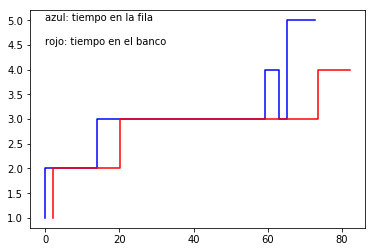

In [52]:
"""
Bank renege example

Covers:

- Resources: Resource
- Condition events

Scenario:
  A counter with a random service time and customers who renege. Based on the
  program bank08.py from TheBank tutorial of SimPy 2. (KGM)

"""
import random

import simpy

import random
import math
from matplotlib.pylab import hist, show
import time
x = str(int(time.time()))
x = float(x[len(x)-4:len(x)]) #esta es la semilla del número aleatorio

RANDOM_SEED = 42
NEW_CUSTOMERS = 5  # Total number of customers
INTERVAL_CUSTOMERS = 12.0  # Generate new customers roughly every x seconds
MIN_PATIENCE = 1  # Min. customer patience
MAX_PATIENCE = 3  # Max. customer patience
atendidos = renegados = clientes = 0
#clientes = []
tiempoEnFila = []
tiempoEnBanco = []
clientesEnFila = []
clientesEnBanco = []

def congruencialMixto():
    global x
    x = x + 1
    a=1013904223 #5.0
    c=1664525 #4.0
    m=2**32 #8.0
    numero=float((a*x+c)%m)
    aleatorio=float(numero/m)
    return aleatorio

def continuaExponencial(media):
    lambdaa = 1 / media
    x = (-1/lambdaa) * math.log(congruencialMixto())#, math.exp(1))
    #x = x**(-1)
    #print ("continuaExponencial: ", x)
    return x #**(-1) #lo invertí

def uniformeContinua(a, b):
    x = congruencialMixto()
    uniforme = a + x * (b-a) 
    return uniforme

def source(env, number, interval, counter):
    """Source generates customers randomly"""
    for i in range(number):
        c = customer(env, 'Customer%02d' % i, counter, time_in_bank=9.0)
        env.process(c)
        t = continuaExponencial(interval) #random.expovariate(1.0 / interval)
        #print ("division ", 1.0 / interval)
        yield env.timeout(t)
    #print ("Número de clientes que llegaron: ", i)


def customer(env, name, counter, time_in_bank):
    global atendidos, renegados, clientes
    """Customer arrives, is served and leaves."""
    arrive = env.now
    print('Llegué en %7.4f %s: Here I am niggas' % (arrive, name))
    clientes += 1
    tiempoEnFila.append(env.now)
    clientesEnFila.append(clientes)
    
    with counter.request() as req:
        patience = uniformeContinua(MIN_PATIENCE, MAX_PATIENCE) #random.uniform(MIN_PATIENCE, MAX_PATIENCE)
        # Wait for the counter or abort at the end of our tether
        results = yield req | env.timeout(patience) #queda un objeto request
        wait = env.now - arrive
        print("wait: ", wait, name)
        
        if req in results:
            # We got to the counter
            print('%7.4f %s: Waited %6.3f' % (env.now, name, wait))
            
            tib = continuaExponencial(time_in_bank) #random.expovariate(1.0 / time_in_bank)
            yield env.timeout(tib)
            tiempoEnBanco.append(env.now)
            print('%7.4f %s: Finished' % (env.now, name))
            atendidos += 1
            clientesEnBanco.append(atendidos)

        else:
            # We reneged
            print('%7.4f %s: RENEGED after %6.3f' % (env.now, name, wait))
            renegados += 1
            #fila -= 1
            tiempoEnFila.append(env.now)
            clientesEnFila.append(clientes - 1)


# Setup and start the simulation
print('Bank renege')
random.seed(RANDOM_SEED)
env = simpy.Environment()

# Start processes and run
counter = simpy.Resource(env, capacity=1)
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
env.run()

print ("número de clientes que llegaron: ", clientes)
print ("atendidos: ", atendidos)
print ("renegados: ", renegados)
print ("tiempo promedio de espera en la fila: ", sum(tiempoEnFila)/len(tiempoEnFila), "tiempos en la fila ", (tiempoEnFila)) 
print ("tiempo promedio de espera en el banco: ", sum(tiempoEnBanco)/len(tiempoEnBanco), "tiempos en el banco ", tiempoEnBanco)
print ("clientes en la fila ", (clientesEnFila), " clientes en banco ", clientesEnBanco)

import matplotlib.pyplot as plt

plt.plot(tiempoEnFila, clientesEnFila, linestyle='steps', color='b')
plt.plot(tiempoEnBanco, clientesEnBanco, linestyle='steps', color='r')
plt.text(0, 5, 'azul: tiempo en la fila')
plt.text(0, 4.5, 'rojo: tiempo en el banco')
plt.show()

# 6.c

In [20]:
print("Los resultados de este punto serán los mismos del punto a porque tienen los mismos parámetros")

Los resultados de este punto serán los mismos del punto a porque tienen los mismos parámetros


# 7

## Con los parámetros dados en la mayoría de las simulaciones el escenario b atendía más clientes satisfactoriamente. Pensando en la comodidad del cliente el tiempo que pase este en el banco debe ser lo más bajo posible para que no se retire de este sin que su visita no sea benéfica.

In [ ]:
import math

def continuaExponencial(media):
    lambdaa = 1 / media
    x = (-1/lambdaa) * math.log(random.uniform(0,1))#, math.exp(1))
    #x = x**(-1)
    #print ("continuaExponencial: ", x)
    return x #**(-1) #lo invertí

print (continuaExponencial(10.0))
print (random.expovariate(1.0 / 10.0), 1.0 / 10.0)
print (random.uniform(1, 3))


In [ ]:
import time
import time
x = str(int(time.time()))
x = float(x[len(x)-4:len(x)]) #esta es la semilla del número aleatorio

def congruencialMixto():
    global x
    #x = x + 1
    a=1013904223 #5.0
    c=1664525 #4.0
    m=2**32 #8.0
    numero=float((a*x+c)%m)
    aleatorio=float(numero/m)
    return aleatorio

def uniformeContinua(a, b):
    x = congruencialMixto()
    uniforme = a + x * (b-a) 
    return uniforme

print (uniformeContinua(1,3))
print (x)

In [ ]:
def car(env):
    while True:
        print('Start parking at %d' % env.now)
        parking_duration = 5
        yield env.timeout(parking_duration)

        print('Start driving at %d' % env.now)
        trip_duration = 2
        yield env.timeout(trip_duration)
        

env = simpy.Environment()
env.process(car(env))
env.run(until=20)
#car(1)

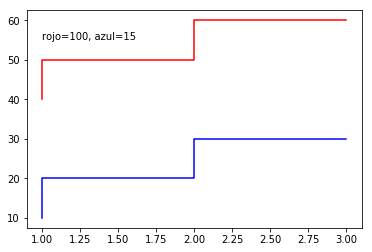

In [16]:
import matplotlib.pyplot as plt

x=[1,2,3]
y=[10,20,30]
z=[40,50,60]

plt.plot(x, y, linestyle='steps', color='b')
plt.plot(x, z, linestyle='steps', color='r')
plt.text(1, 55, 'rojo=100, azul=15')
plt.show()